In [1]:
import sys
sys.path.insert(0,'/home/pi/zumi/lib')
import Speaker as speaker
import Engine as engine
from IPython import display 
import numpy as np
import PIL.Image 
from TawnCam import PiCamera
import time
import cv2

import TouristDemoHelper as tourist_demo

model = tourist_demo.load_model("landmark")
# speaker.play()


Using TensorFlow backend.
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.4 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: builtins.type size changed, may indicate binary incompatibility. Expected 432, got 412
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 56, got 52
  return f(*args, **kwds)


model is loaded 🥂


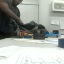

'nyc'

3

array([[1.0689415e-30, 1.1910645e-05, 1.2632605e-29, 9.9998808e-01,
        0.0000000e+00, 8.0795048e-33]], dtype=float32)

In [ ]:
camera = PiCamera(image_w=64, image_h=64, image_d=3, framerate=10)

try:
    while True:

        frame = camera.run()
        frame = cv2.flip(frame, -1)
        
        pred = model.predict(frame[None, :, :, :])
        iArrowDir = np.argmax(pred[0])

        if iArrowDir == 0:
            predicted_label = 'up' 
        elif iArrowDir == 1:
            predicted_label = 'left'
        elif iArrowDir == 2:
            predicted_label = 'right' 
        elif iArrowDir == 3:
            predicted_label = "nyc"
        elif iArrowDir == 4:
            predicted_label = "seattle"
        elif iArrowDir == 5:
            predicted_label = "eiffel"
        elif iArrowDir == 6:
            predicted_label = "bigben"
        elif iArrowDir == 7:
            predicted_label = "china"
        elif iArrowDir == 8:
            predicted_label = "khalifa"
        elif iArrowDir == 9:
            predicted_label = "chicago"
        elif iArrowDir == 10:
            predicted_label = "intersection"
        elif iArrowDir == 11:
            predicted_label = "start"
                    
        display.clear_output(wait=True)
        display.display(PIL.Image.fromarray(frame))
        display.display(predicted_label)
        display.display(iArrowDir)
        
        display.display(pred)
        
        isCorrect = input("Input 'y' if correct: ") 
        if isCorrect == 'y':
            correct_label = predicted_label
        else:
            correct_label = input("what is the correct label? ")
        
        tourist_demo.take_a_bunch_of_pictures(camera, correct_label)
                                       
        if correct_label == "up":
            engine.forward_a_bit()
        elif correct_label == 'left':
            engine.left_a_bit()
        elif correct_label == "right":
            engine.right_a_bit()
        else:
            engine.forward_a_bit()
        
        engine.stop()
    
finally:
    engine.stop()
    camera.shutdown()